In [1]:
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import mpld3

In [2]:
first = date(2021, 12, 5)
today = date.today()

df_all = pd.DataFrame(columns = ['date', 'cases_0_9', 'cases_10_19'])

curr = first

while (curr < today):
    
    file_path = "../data/" + curr.isoformat() + ".csv"
    df_curr = pd.read_csv(file_path, index_col = 0)
    df_all = df_all.append({'date': curr.isoformat(), 'cases_0_9': df_curr.iloc[0,1], 'cases_10_19': df_curr.iloc[1,1]}, ignore_index = True)
    curr = curr + timedelta(days = 1)

In [3]:
# cron job picked up previous day's data on two dates: 2021-12-08 and 2021-12-16
# these correspond to indices 3 and 11 of df_0_9
# remove these two rows from df
# then reset the index i.e. re-number each row

df_all.drop([3, 11], inplace = True)
df_all.reset_index(drop = True, inplace = True)

In [4]:
# date column is strings; convert to datetime64 so the plot doesn't mash all the axis labels together

df_all['date'] = pd.to_datetime(df_all['date'])

In [5]:
df_all

,date,cases_0_9,cases_10_19
0,2021-12-05,51,64
1,2021-12-06,42,56
2,2021-12-07,36,42
3,2021-12-09,51,83
4,2021-12-10,68,54
5,2021-12-11,77,70
6,2021-12-12,53,74
7,2021-12-13,59,74
8,2021-12-14,65,75
9,2021-12-15,67,120


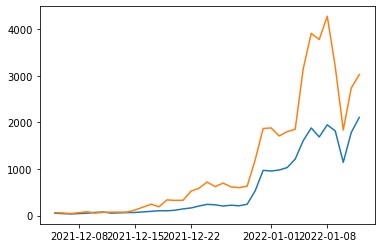

In [6]:
plt.plot(df_all['date'], df_all['cases_0_9'])
plt.plot(df_all['date'], df_all['cases_10_19'])

plt.show()

In [ ]:
fig = ax.get_figure()
mpld3.plugins.connect(fig, mpld3.plugins.PointHTMLTooltip(ax.lines))
mpld3.save_html(fig, "../cases_0_9.html")